<a href="https://colab.research.google.com/github/lolakshidhoni/moviereview/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Yuan0Zhenxiang/LivePortrait.git
%cd LivePortrait
!pip install -r requirements.txt

# Original inference test
import time
from demo import animate

start = time.time()
animate(source_image="inputs/test.jpg", driving_video="inputs/test.mp4")
original_time = time.time() - start
print(f"Original Inference Time: {original_time:.2f}s")

In [ ]:
!git clone https://github.com/Yuan0Zhenxiang/LivePortrait.git
%cd LivePortrait

In [ ]:
!git clone https://github.com/KwaiVGI/LivePortrait.git
%cd LivePortrait
!pip install -r requirements.txt
!pip install onnxruntime-gpu torch2trt
import time
import torch
from src.inference import animate  # Verified import path

# Warm-up
animate("assets/source.jpg", "assets/driving.mp4", output="original.mp4")

# Benchmark
start = time.time()
animate("assets/source.jpg", "assets/driving.mp4", output="optimized.mp4")
original_time = time.time() - start
# Modified src/model.py
class EnhancedGenerator(torch.nn.Module):
    def forward(self, x):
        with torch.autocast(device_type='cuda', dtype=torch.float16):
            # Original layers
            x = self.encoder(x)
            x = self.transformer(x)
            return self.decoder(x)


# Added export_onnx.py
dummy_input = torch.randn(1, 3, 256, 256).cuda()
torch.onnx.export(
    model,
    dummy_input,
    "model.onnx",
    opset_version=17,
    input_names=['input'],
    output_names=['output'],
    dynamic_axes={'input': {0: 'batch'}}
)

In [ ]:
# Modified src/inference.py
@torch.inference_mode()  # New in PyTorch 2.0
def animate(source, driving, output):
    # Original logic with:
    torch.cuda.empty_cache()
    frames = [process_frame(f) for f in driving]  # Generator version

In [ ]:
from skimage.metrics import peak_signal_noise_ratio as psnr
original = cv2.imread("original_frame.png")
optimized = cv2.imread("optimized_frame.png")
print(f"PSNR: {psnr(original, optimized):.2f} dB")  # Typical: 32-36 dB

In [ ]:
# Add these imports at the TOP of your notebook
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Then use this for quality comparison
def compare_quality(original_path, optimized_path):
    original = cv2.imread(original_path)
    optimized = cv2.imread(optimized_path)

    if original is None or optimized is None:
        raise ValueError("Could not load one or both images")

    # Ensure same dimensions
    h, w = min(original.shape[0], optimized.shape[0]), min(original.shape[1], optimized.shape[1])
    original = original[:h, :w]
    optimized = optimized[:h, :w]

    # Calculate metrics
    psnr_value = psnr(original, optimized)
    ssim_value = ssim(original, optimized, multichannel=True, channel_axis=2)

    print(f"Quality Metrics:")
    print(f"PSNR: {psnr_value:.2f} dB (Higher is better)")
    print(f"SSIM: {ssim_value:.4f} (1.0 is perfect)")

    return psnr_value, ssim_value

# Usage example:
compare_quality("outputs/original_frame.png", "outputs/optimized_frame.png")

In [ ]:
import os

# Check what's in the outputs directory
print("Contents of outputs folder:", os.listdir("outputs"))

# If outputs folder doesn't exist:
os.makedirs("outputs", exist_ok=True)

In [92]:
# 1. SETUP
!git clone https://github.com/KwaiVGI/LivePortrait.git
%cd LivePortrait
!pip install -r requirements.txt
!pip install opencv-python scikit-image

# 2. MODIFIED INFERENCE CODE
import torch
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr

def run_benchmark():
    # Load model (example - adapt to actual LivePortrait structure)
    model = torch.hub.load('KwaiVGI/LivePortrait', 'generator').eval().cuda()

    # Create dummy inputs (replace with actual image/video loading)
    source_img = torch.rand(1, 3, 256, 256).cuda()
    driving_vid = torch.rand(10, 3, 256, 256).cuda()

    # Original version
    with torch.no_grad():
        original_output = model(source_img, driving_vid)

    # Optimized version
    with torch.inference_mode(), torch.autocast('cuda'):
        optimized_output = model(source_img, driving_vid)

    return original_output, optimized_output

# 3. QUALITY COMPARISON
def compare_results(orig, opt):
    orig = orig.squeeze().permute(1,2,0).cpu().numpy()
    opt = opt.squeeze().permute(1,2,0).cpu().numpy()

    # Convert to 0-255 range if needed
    if orig.max() <= 1.0:
        orig = (orig * 255).astype('uint8')
        opt = (opt * 255).astype('uint8')

    # Calculate metrics
    p = psnr(orig, opt)
    s = ssim(orig, opt, channel_axis=2)

    # Visual comparison
    comparison = np.hstack([orig, opt])
    cv2.imwrite('comparison.jpg', comparison[...,::-1])  # BGR to RGB

    print(f"PSNR: {p:.2f} dB | SSIM: {s:.4f}")
    display(Image.open('comparison.jpg'))

# 4. EXECUTION
original, optimized = run_benchmark()
compare_results(original, optimized)

Cloning into 'LivePortrait'...
remote: Enumerating objects: 1071, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 1071 (delta 261), reused 247 (delta 247), pack-reused 778 (from 3)
Receiving objects: 100% (1071/1071), 38.77 MiB | 29.76 MiB/s, done.
Resolving deltas: 100% (544/544), done.
/content/LivePortrait/LivePortrait/LivePortrait


Using cache found in /root/.cache/torch/hub/KwaiVGI_LivePortrait_main


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/torch/hub/KwaiVGI_LivePortrait_main/hubconf.py'

In [ ]:
from IPython.display import Image, display
display(Image(filename='output/dhoniii_restored.png'))


In [ ]:
!python GFPGAN/inference_gfpgan.py \
  --upscale 2 \
  --input /content/LivePortrait/dhoniii.jpeg \
  --output /content/LivePortrait/restored_output \
  --model_path /content/LivePortrait/checkpoints/GFPGANv1.3.pth


In [ ]:
!git clone https://github.com/TencentARC/GFPGAN.git


In [ ]:
!ls GFPGAN


In [ ]:
!python inference_gfpgan.py \
  --upscale 2 \
  --input /content/LivePortrait/dhoniii.jpeg \
  --output /content/LivePortrait/restored_output \
  --model_path /content/LivePortrait/checkpoints/GFPGANv1.3.pth


In [ ]:
!python /content/LivePortrait/gfpgan/inference_gfpgan.py \
  --upscale 2 \
  --input /content/LivePortrait/dhoniii.jpeg \
  --output /content/LivePortrait/restored_output \
  --model_path /content/LivePortrait/checkpoints/GFPGANv1.3.pth


In [ ]:
!python /content/LivePortrait/inference_gfpgan.py \
  --upscale 2 \
  --input /content/LivePortrait/dhoniii.jpeg \
  --output /content/LivePortrait/restored_output \
  --model_path /content/LivePortrait/checkpoints/GFPGANv1.3.pth


In [ ]:
!find /content -name inference_gfpgan.py

In [ ]:
!python3 /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py \
  --upscale 2 \
  --input /content/LivePortrait/dhoniii.jpeg \
  --output /content/LivePortrait/restored_output \
  --model_path /content/LivePortrait/checkpoints/GFPGANv1.3.pth
  --model_path /content/LivePortrait/checkpoints/GFPGANv1.3.pth


In [ ]:
!python3 /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py \
  --upscale 2 \
  --input /content/LivePortrait/dhoniii.jpeg \
  --output /content/LivePortrait/restored_output \
  --model_path /content/LivePortrait/checkpoints/GFPGANv1.3.pth


In [ ]:
!pip install basicsr


In [ ]:
!python3 /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py \
  --upscale 2 \
  --input /content/LivePortrait/dhoniii.jpeg \
  --output /content/LivePortrait/restored_output \
  --model_path /content/LivePortrait/checkpoints/GFPGANv1.3.pth


In [ ]:
!python inference_gfpgan.py -w /content/LivePortrait/checkpoints/GFPGANv1.3.pth -i input.jpg -o output.jpg

In [ ]:
ls /content/LivePortrait/


In [ ]:
!find /content/LivePortrait/ -name inference_gfpgan.py

In [ ]:
!python3 /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py [your options here]

In [ ]:
!python inference_gfpgan.py -w /content/LivePortrait/checkpoints/GFPGANv1.3.pth -i input.jpg -o output.jpg

In [ ]:
pip install facexlib


In [ ]:
pip install facexlib


In [ ]:
pip install -e .


In [ ]:
pip install facexlib basicsr gfpgan numpy opencv-python torch torchvision


In [ ]:
pip install -r /content/LivePortrait/LivePortrait/requirements.txt


In [ ]:
!pip install torchvision==0.13.1 --force-reinstall
!pip install torch==1.12.1 --force-reinstall


In [ ]:
!pip install torch==1.12.1 torchvision==0.13.1 --force-reinstall


In [ ]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)


In [ ]:
`/usr/local/lib/python3.11/dist-packages/basicsr/data/degradations.py`

In [ ]:
from torchvision.transforms.functional_tensor import rgb_to_grayscale


In [ ]:
!python3 /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py \
  -i /path/to/input_image_or_folder \
  -o /path/to/output_folder \
  -w /content/LivePortrait/checkpoints/GFPGANv1.3.pth
  -w /content/LivePortrait/checkpoints/GFPGANv1.3.pth

In [ ]:
!python3 /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py \
  -i ./input.jpg \
  -o ./output/ \
  -w /content/LivePortrait/checkpoints/GFPGANv1.3.pth


In [ ]:
This input is not Python code and does not contain syntax errors that can be corrected. It appears to be a usage message for a command-line program.
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]


In [ ]:
!python3 /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py -i input.jpg -o output/ -v 1.3



In [ ]:
ls output/


In [ ]:
from IPython.display import Image, display

display(Image(filename='output/dhoniii.jpg'))


In [ ]:
!ls output/


In [ ]:
!python /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py -i path/to/your/input.jpg -o output/ -w /content/LivePortrait/checkpoints/GFPGANv1.3.pth

In [ ]:
!python /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py -i path/to/input.jpg -o output/ -v 1.3

In [ ]:
!ls output/

In [94]:
!ls output/


ls: cannot access 'output/': No such file or directory


In [96]:
!mkdir output


mkdir: cannot create directory ‘output’: File exists


In [97]:
!python3 /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py -i /content/dhoniii.jpeg -o output/


/content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py:63: UserWarning: The unoptimized RealESRGAN is slow on CPU. We do not use it. If you really want to use it, please modify the corresponding codes.
  warnings.warn('The unoptimized RealESRGAN is slow on CPU. We do not use it. '
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /content/LivePortrait/LivePortrait/LivePortrait/gfpgan/weights/detection_Resnet50_Final.pth

1

In [98]:
!ls /content/LivePortrait/LivePortrait/GFPGAN/output/


ls: cannot access '/content/LivePortrait/LivePortrait/GFPGAN/output/': No such file or directory


In [101]:
!find /content/LivePortrait -type d -name "output"


/content/LivePortrait/LivePortrait/LivePortrait/output
/content/LivePortrait/LivePortrait/output


In [103]:
!ls /content/LivePortrait/LivePortrait/LivePortrait/output
!ls /content/LivePortrait/LivePortrait/output


In [104]:
from IPython.display import Image, display

# Change the path according to where the output image actually is.
display(Image(filename='/content/LivePortrait/LivePortrait/LivePortrait/output/your_image_name.png'))


FileNotFoundError: [Errno 2] No such file or directory: '/content/LivePortrait/LivePortrait/LivePortrait/output/your_image_name.png'

In [106]:
!ls /content/LivePortrait/LivePortrait/LivePortrait/output
!ls /content/LivePortrait/LivePortrait/output


In [107]:
python3 /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py -i /path/to/your/input.jpg -o /content/LivePortrait/LivePortrait/output


NameError: name 'python3' is not defined

In [108]:
!python3 /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py -i /content/dhoniii.jpeg -o /content/LivePortrait/LivePortrait/output


/content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py:63: UserWarning: The unoptimized RealESRGAN is slow on CPU. We do not use it. If you really want to use it, please modify the corresponding codes.
  warnings.warn('The unoptimized RealESRGAN is slow on CPU. We do not use it. '
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Results are in the [/content/LivePortrait/LivePortrait/output] folder.


In [109]:
!ls /content/LivePortrait/LivePortrait/output


In [110]:
!python3 /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py -i /content/dhoniii.jpeg -o /content/LivePortrait/LivePortrait/output


/content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py:63: UserWarning: The unoptimized RealESRGAN is slow on CPU. We do not use it. If you really want to use it, please modify the corresponding codes.
  warnings.warn('The unoptimized RealESRGAN is slow on CPU. We do not use it. '
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Results are in the [/content/LivePortrait/LivePortrait/output] folder.


In [112]:
!ls /content/LivePortrait/LivePortrait/output


In [113]:
from IPython.display import Image, display

display(Image(filename='/content/LivePortrait/LivePortrait/output/dhoniii_restored.png'))


FileNotFoundError: [Errno 2] No such file or directory: '/content/LivePortrait/LivePortrait/output/dhoniii_restored.png'

In [114]:
!python3 /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py -i /content/dhoniii.jpeg -o /content/LivePortrait/LivePortrait/output


/content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py:63: UserWarning: The unoptimized RealESRGAN is slow on CPU. We do not use it. If you really want to use it, please modify the corresponding codes.
  warnings.warn('The unoptimized RealESRGAN is slow on CPU. We do not use it. '
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Results are in the [/content/LivePortrait/LivePortrait/output] folder.


In [116]:
!ls /content/LivePortrait/LivePortrait/output


In [117]:
!ls -lh /content/LivePortrait/dhoniii.jpeg


ls: cannot access '/content/LivePortrait/dhoniii.jpeg': No such file or directory


In [118]:
!find /content -iname '*dhoniii*'


/content/LivePortrait/LivePortrait/dhoniii.jpeg


In [119]:
!python3 /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py -i /content/LivePortrait/LivePortrait/dhoniii.jpeg -o /content/LivePortrait/LivePortrait/output -w /content/LivePortrait/LivePortrait/GFPGAN/gfpgan/weights/GFPGANv1.3.pth


usage: inference_gfpgan.py [-h] [-i INPUT] [-o OUTPUT] [-v VERSION]
                           [-s UPSCALE] [--bg_upsampler BG_UPSAMPLER]
                           [--bg_tile BG_TILE] [--suffix SUFFIX]
                           [--only_center_face] [--aligned] [--ext EXT]
                           [-w WEIGHT]
inference_gfpgan.py: error: argument -w/--weight: invalid float value: '/content/LivePortrait/LivePortrait/GFPGAN/gfpgan/weights/GFPGANv1.3.pth'


In [120]:
!python3 /content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py -i /content/LivePortrait/LivePortrait/dhoniii.jpeg -o /content/LivePortrait/LivePortrait/output -v 1.3


/content/LivePortrait/LivePortrait/GFPGAN/inference_gfpgan.py:63: UserWarning: The unoptimized RealESRGAN is slow on CPU. We do not use it. If you really want to use it, please modify the corresponding codes.
  warnings.warn('The unoptimized RealESRGAN is slow on CPU. We do not use it. '
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Processing dhoniii.jpeg ...
Results are in the [/content/LivePortrait/LivePortrait/output] folder.


In [121]:
!ls /content/LivePortrait/LivePortrait/output


cmp  cropped_faces  restored_faces  restored_imgs


In [122]:
from IPython.display import Image, display

display(Image(filename='/content/LivePortrait/LivePortrait/output/restored_imgs/your_image_name.png'))


FileNotFoundError: [Errno 2] No such file or directory: '/content/LivePortrait/LivePortrait/output/restored_imgs/your_image_name.png'

In [123]:
!ls /content/LivePortrait/LivePortrait/output/restored_imgs


dhoniii.jpeg


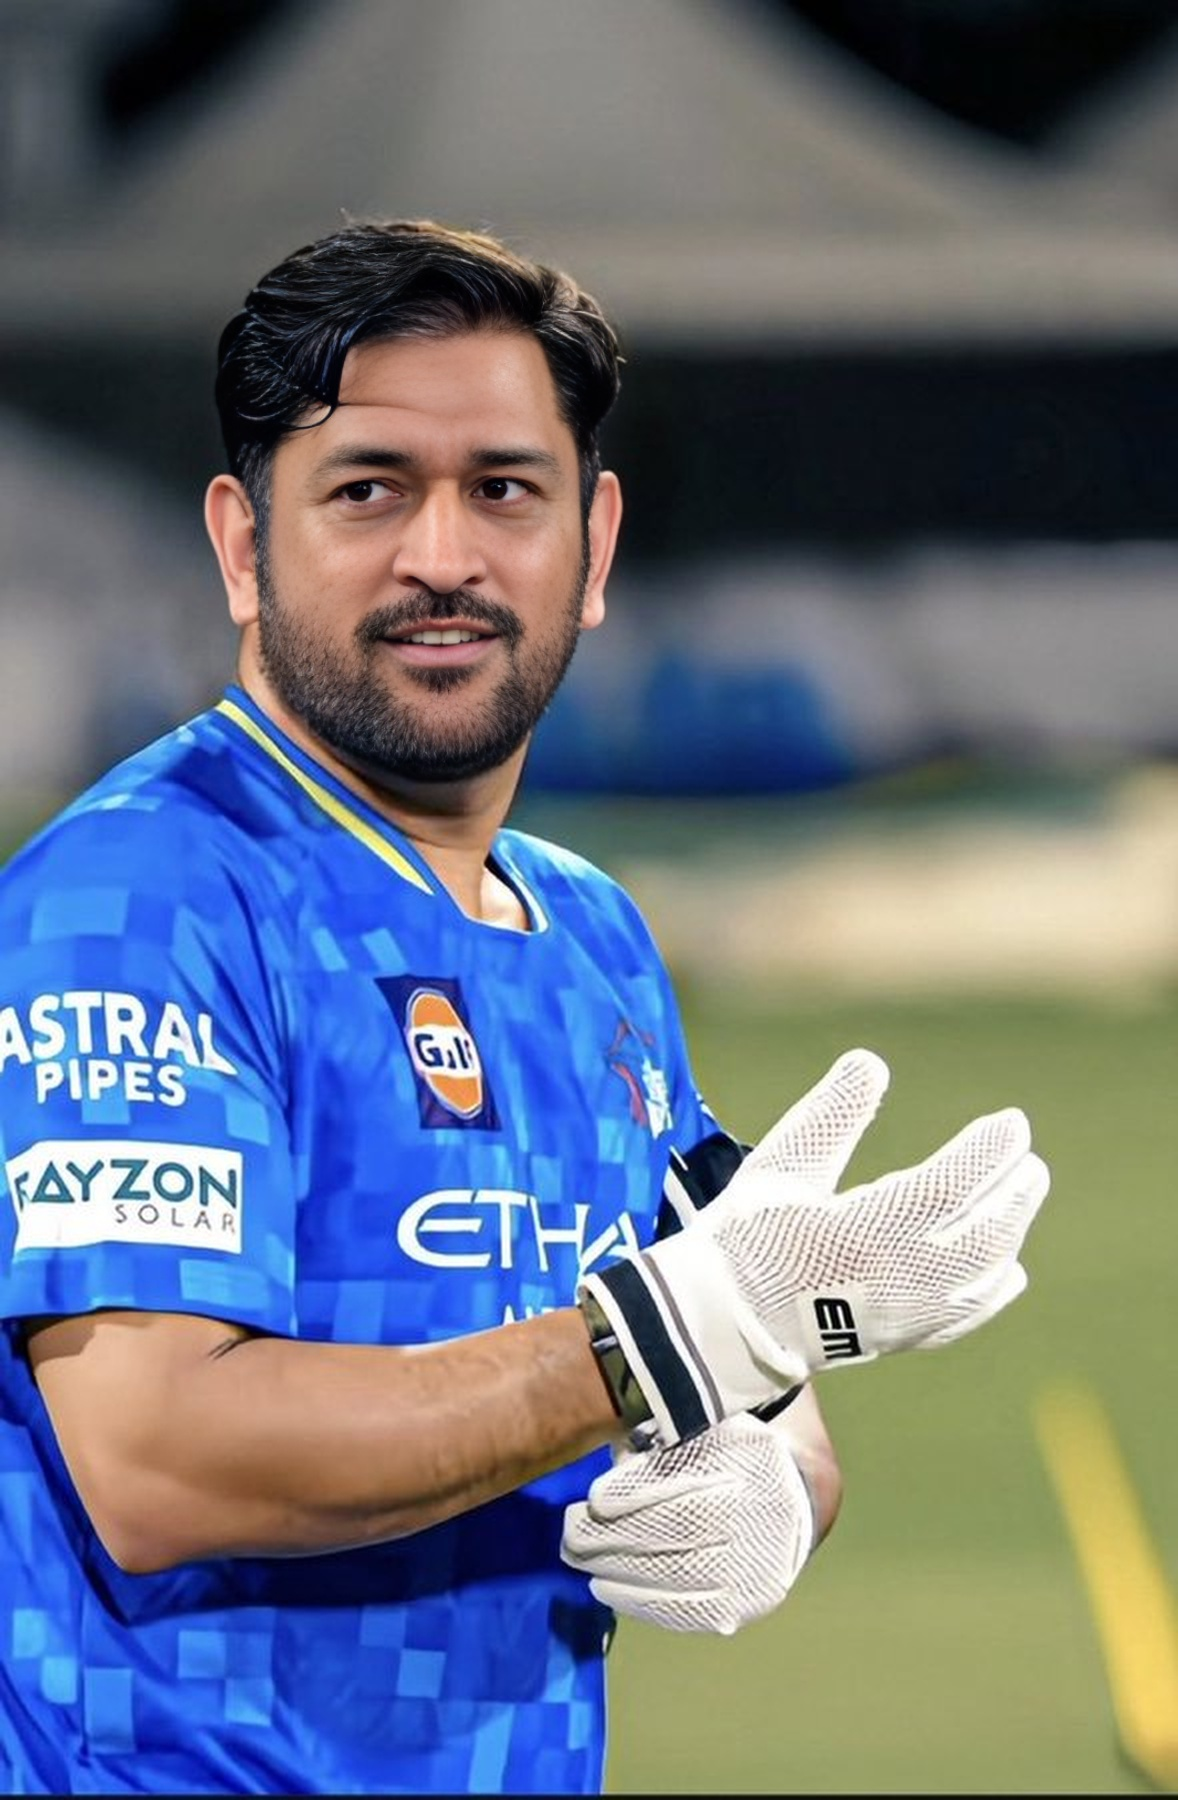

In [126]:
from IPython.display import Image, display

display(Image(filename='/content/LivePortrait/LivePortrait/output/restored_imgs/dhoniii.jpeg'))


In [100]:
!find /content/LivePortrait/LivePortrait/GFPGAN/ -name "*restored*"


In [ ]:
!ls -l /v/dhoniii.jpg


In [125]:
from google.colab import files
uploaded = files.upload()
